In [13]:
%matplotlib inline 
from matplotlib import pyplot as plt

from mxnet import nd, autograd
from mxnet import gluon, init

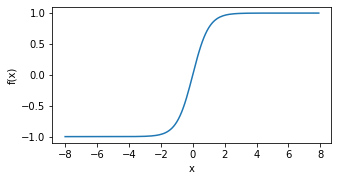

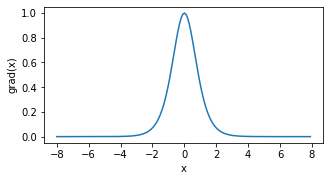

In [11]:
def xyplot(x_vals, y_vals, name):
    plt.rcParams['figure.figsize'] = (5, 2.5)
    plt.plot(x_vals.asnumpy(), y_vals.asnumpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')
    plt.show()
    return 

x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
#     y = x.relu()
#     y = x.sigmoid()
    y = x.tanh()
xyplot(x, y, 'f')

y.backward()
xyplot(x, x.grad, 'grad')

In [41]:


def load_data_fashion_mnist(batch_size):
    mnist_train = gluon.data.vision.FashionMNIST(train=True)
    mnist_test = gluon.data.vision.FashionMNIST(train=False)
    print(len(mnist_train), len(mnist_test))
    feature, label = mnist_train[0]
    print(mnist_train[0][0].shape, mnist_train[0][1].shape)
    
    num_workers = 4
    transformer = gluon.data.vision.transforms.ToTensor()

    train_iter = gluon.data.DataLoader(
        mnist_train.transform_first(transformer),
        batch_size, 
        shuffle=True, 
        num_workers=num_workers
    )
    test_iter = gluon.data.DataLoader(
        mnist_test.transform_first(transformer),
        batch_size, 
        shuffle=True, 
        num_workers=num_workers
    )
    return train_iter, test_iter

def get_fashion_mnist_label_name(labels):
    label_names = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]
    return [label_names[int(i)] for i in labels]

# def show_fashion_mnist(images, label_names):
#     _, figs = plt.subplots(1, len(images), figsize=(12, 12))
#     for f, img, label_name in zip(figs, images, label_names):
#         f.imshow(img.reshape((28, 28)).asnumpy())
#         f.set_title(label_name)
#         f.axes.get_xaxis().set_visible(False)
#         f.axes.get_yaxis().set_visible(False)
#     plt.show()
#     return 


def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size
    return 

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype("float32")
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n

def train(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for ep in range(1, num_epochs+1):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y = y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch {}, loss {}, train acc {}, test acc {}'.format(ep, train_l_sum / n, train_acc_sum / n, test_acc))
    return 

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

# X, y = mnist_train[:9]
# show_fashion_mnist(X, get_fashion_mnist_label_name(y))

60000 10000
(28, 28, 1) ()


In [47]:
num_inputs = 28*28
num_outputs = 10
num_hiddens = 256

W1 = nd.random.normal(0, 0.01, (num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(0, 0.01, (num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)

params = [W1, b1, W2, b2]
for param in params:
    param.attach_grad()
    
def relu(X):
    return nd.maximum(X, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

loss = gluon.loss.SoftmaxCrossEntropyLoss()

num_epochs = 5
lr = 0.5

train(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8268781871795654, train acc 0.6904666666666667, test acc 0.8201
epoch 2, loss 0.49746293614705406, train acc 0.8158833333333333, test acc 0.8511
epoch 3, loss 0.43085319531758626, train acc 0.8402666666666667, test acc 0.851
epoch 4, loss 0.3965172390619914, train acc 0.85385, test acc 0.8634
epoch 5, loss 0.3726353977839152, train acc 0.8633833333333333, test acc 0.8729


In [46]:
net = gluon.nn.Sequential()
net.add(
    gluon.nn.Dense(256, activation='relu'), 
    gluon.nn.Dense(10)
)
net.initialize(init.Normal(sigma=0.01))

loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epchs = 5
train(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)


epoch 1, loss 0.8085499666213989, train acc 0.6954, test acc 0.8189
epoch 2, loss 0.49090032183329263, train acc 0.8178333333333333, test acc 0.8429
epoch 3, loss 0.4282582037607829, train acc 0.8421166666666666, test acc 0.8383
epoch 4, loss 0.3962734753926595, train acc 0.8519833333333333, test acc 0.8682
epoch 5, loss 0.3772151584625244, train acc 0.8617833333333333, test acc 0.8692
